In [326]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

In [3]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr

In [5]:
data_dir= 'data'

In [6]:
image_exts=['jpeg']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)

        
    
    
    

In [8]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 10684 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
data_iterator

In [13]:
batch= data_iterator.next()

In [14]:
#images representated as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:
#Class 0=melenoma
#class 1=not melenoma
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

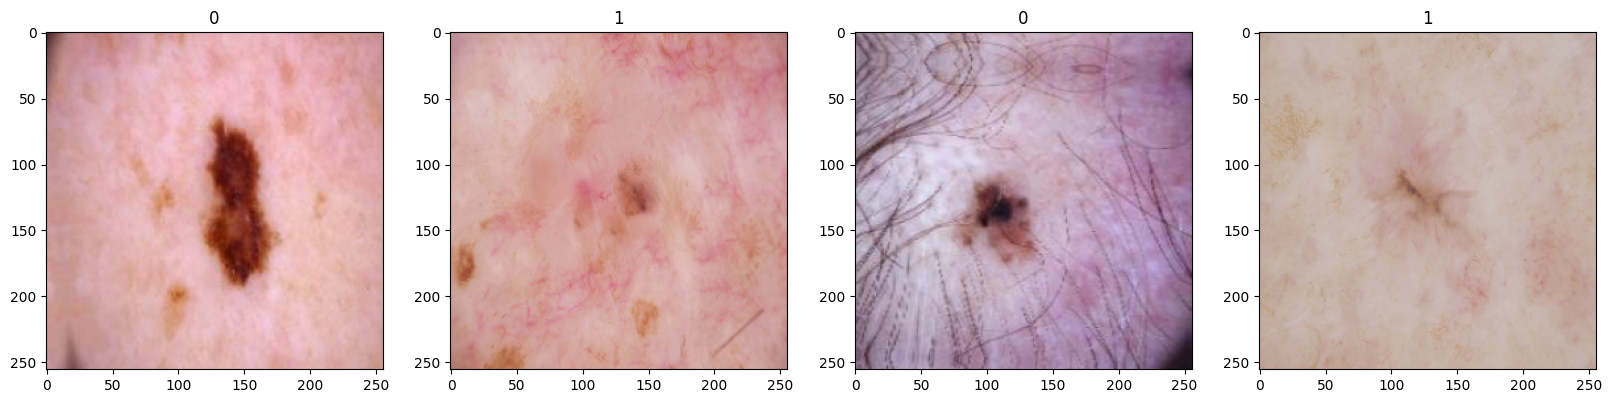

In [16]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
scaled = batch [0] / 255

In [18]:
scaled.max()

1.0

In [19]:
scaled_data = data.map (lambda x,y: (x/255,y))

In [20]:
scaled_iterator = data.as_numpy_iterator().next()[0].min()

In [21]:
scaled_iterator

0.0

In [22]:
len(data)

334

In [23]:
train_size=int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size= int(len(data)*.1)+1

In [24]:
train_size+val_size+test_size

334

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [29]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir = 'logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
233/233 [==============================] - 366s 2s/step - loss: 11.8367 - accuracy: 0.6718 - val_loss: 0.5733 - val_accuracy: 0.7262
Epoch 2/20
233/233 [==============================] - 323s 1s/step - loss: 0.5277 - accuracy: 0.7519 - val_loss: 0.5102 - val_accuracy: 0.7924
Epoch 3/20
233/233 [==============================] - 336s 1s/step - loss: 0.4328 - accuracy: 0.7952 - val_loss: 0.4561 - val_accuracy: 0.8022
Epoch 4/20
233/233 [==============================] - 338s 1s/step - loss: 0.4076 - accuracy: 0.8125 - val_loss: 0.4675 - val_accuracy: 0.7980
Epoch 5/20
233/233 [==============================] - 330s 1s/step - loss: 0.3581 - accuracy: 0.8388 - val_loss: 0.8024 - val_accuracy: 0.7803
Epoch 6/20
233/233 [==============================] - 338s 1s/step - loss: 0.3180 - accuracy: 0.8668 - val_loss: 0.5264 - val_accuracy: 0.7766
Epoch 7/20
233/233 [==============================] - 386s 2s/step - loss: 0.2451 - accuracy: 0.9054 - val_loss: 0.5177 - val_accuracy: 0.783

In [34]:
hist.history

{'loss': [11.836714744567871,
  0.5277136564254761,
  0.43281957507133484,
  0.40762627124786377,
  0.3580818772315979,
  0.3179571032524109,
  0.2451200634241104,
  0.20319676399230957,
  0.16955631971359253,
  0.14286591112613678,
  0.1290757954120636,
  0.1354280710220337,
  0.09211444109678268,
  0.080325648188591,
  0.04977324604988098,
  0.05413089320063591,
  0.055318497121334076,
  0.04254462569952011,
  0.04387400299310684,
  0.03282776102423668],
 'accuracy': [0.6718079447746277,
  0.7518776655197144,
  0.7951985001564026,
  0.8125,
  0.8387875556945801,
  0.8668186664581299,
  0.9054452776908875,
  0.9224785566329956,
  0.9416577219963074,
  0.951314389705658,
  0.9545332789421082,
  0.957886278629303,
  0.9729077219963074,
  0.9761266112327576,
  0.9865880012512207,
  0.9840397238731384,
  0.983905553817749,
  0.9864538908004761,
  0.9879291653633118,
  0.9912821650505066],
 'val_loss': [0.5732842087745667,
  0.5101574063301086,
  0.45605164766311646,
  0.46750369668006897,

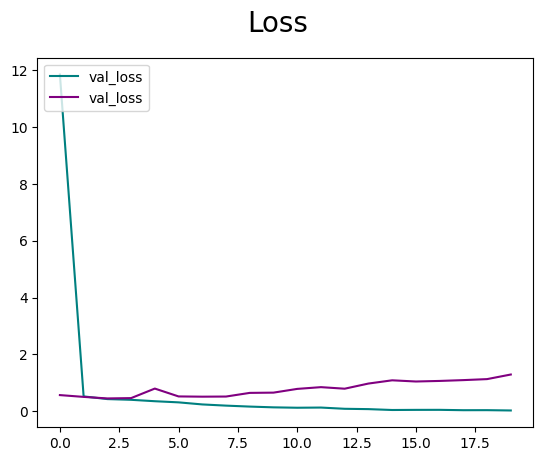

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal' , label='val_loss')
plt.plot(hist.history['val_loss'], color='purple', label='val_loss')
fig.suptitle('Loss' , fontsize = 20)
plt.legend(loc="upper left")
plt.show()

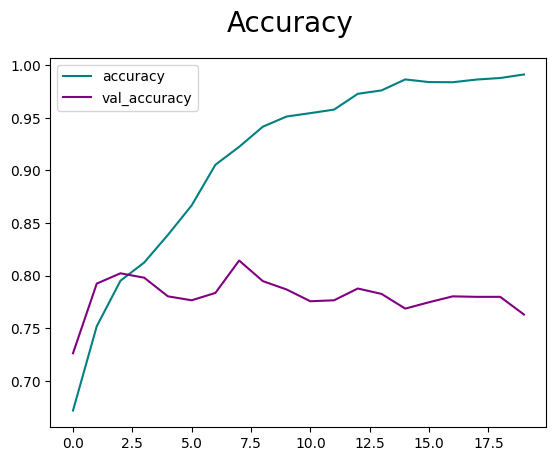

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal' , label='accuracy')
plt.plot(hist.history['val_accuracy'], color='purple', label='val_accuracy')
fig.suptitle('Accuracy' , fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
len(test)

34

In [40]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 362ms/step


In [81]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:0.7644710540771484, Recall:0.7014651894569397, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.7407749>>


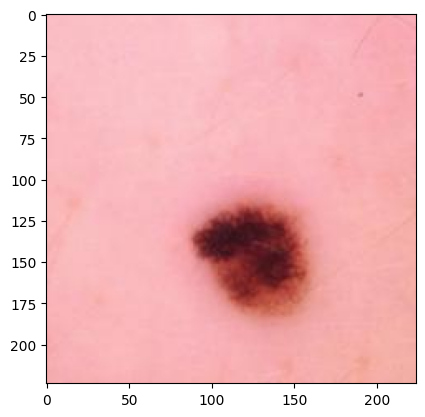

In [328]:
import cv2
img = cv2.imread('mm11.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

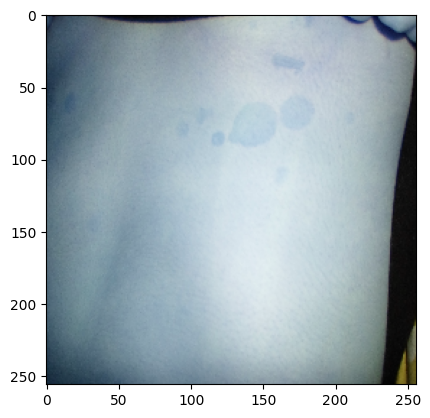

In [313]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [314]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 34ms/step


In [315]:
np.expand_dims(resize,0)

array([[[[ 48.375,  65.375,  86.375],
         [ 42.5  ,  57.5  ,  83.5  ],
         [ 29.125,  43.125,  71.125],
         ...,
         [147.75 , 163.75 , 170.75 ],
         [138.625, 154.625, 160.625],
         [130.625, 146.625, 152.625]],

        [[ 60.375,  79.375, 100.375],
         [ 45.875,  63.375,  86.375],
         [ 35.25 ,  51.25 ,  74.25 ],
         ...,
         [134.125, 152.125, 159.125],
         [134.125, 150.125, 157.125],
         [133.   , 149.   , 156.   ]],

        [[ 58.125,  79.125, 101.125],
         [ 52.375,  73.375,  95.375],
         [ 40.25 ,  58.25 ,  81.25 ],
         ...,
         [134.125, 152.125, 159.125],
         [128.375, 146.375, 153.375],
         [134.75 , 152.75 , 159.75 ]],

        ...,

        [[ 20.375,  37.375,  56.375],
         [ 19.875,  39.875,  57.875],
         [ 22.375,  42.375,  60.375],
         ...,
         [ 79.125,  74.125,  25.125],
         [ 79.5  ,  73.5  ,  20.5  ],
         [ 95.125,  88.125,  33.125]],

        [[

In [316]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 42ms/step


In [317]:
yhat

array([[2.160088e-05]], dtype=float32)

In [318]:
if yhat > 0.5:
    print(f'Predicted CLass is Melenoma')
else:
    print(f'Predicted Class is Not Melenoma')

Predicted Class is Not Melenoma


In [247]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', 'melenoma detection.h5'))

In [248]:
new_model = load_model(os.path.join('models' , 'melenoma detection.h5' ))

In [249]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 112ms/step


In [250]:
if (yhatnew > 0.5):
    print(f'Predicted CLass is Melenoma')
else:
    print(f'Predicted Class is Not Melenoma')

Predicted CLass is Melenoma
